# TO-DO (Possible steps)

- Encode Categorical Variables
- Convert categorical variables to numerical representations if needed
- Do buckets of each category it is necessary
- Normalize/Standardize Numerical Features
- Remove or combine that are highly correlated to prevent multicollinearity
- Apply PCA if it is suitable. In that case include the variance explainability plot

**OUTPUT**: a csv file saved in '../../data/price_predictor/processed/Sample_Product_Data_Cleaned.csv' ready for machine learning input.

In [29]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('../../data/price_predictor/staged/Sample_Product_Data_Cleaned.csv')

In [10]:
categorical_columns = [
    'product_type', 'customer_demographics', 'shipping_carriers', 'supplier_name',
    'location', 'inspection_results', 'transportation_modes', 'routes'
]
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [20]:
df_encoded.set_index('sku', inplace=True)

In [21]:
df_encoded

,price,availability,number_of_products_sold,revenue_generated,stock_levels,lead_times,order_quantities,shipping_times,shipping_costs,lead_time,...,location_Delhi,location_Kolkata,location_Mumbai,inspection_results_Pass,inspection_results_Pending,transportation_modes_Rail,transportation_modes_Road,transportation_modes_Sea,routes_Route_B,routes_Route_C
sku,,,,,,,,,,,,,,,,,,,,,
062000007,22.79,17.0,715.0,8656.12,58.0,24.0,79.0,7.0,4.70,16.0,...,False,True,False,False,True,True,False,False,True,False
1VBA0260GE,53.97,78.0,949.0,4516.14,75.0,15.0,90.0,7.0,8.68,3.0,...,True,False,False,True,False,True,False,False,False,False
1VBF0810GE,80.18,44.0,687.0,6449.54,97.0,20.0,10.0,7.0,6.37,13.0,...,True,False,False,False,True,False,False,False,True,False
1VMG0080GE,62.87,46.0,903.0,1755.28,18.0,21.0,98.0,8.0,2.10,20.0,...,True,False,False,False,False,True,False,False,False,True
1VMG0140GE,83.82,99.0,163.0,7097.87,88.0,18.0,50.0,2.0,6.27,23.0,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INDI040,77.88,63.0,290.0,1311.02,99.0,26.0,7.0,6.0,3.16,6.0,...,False,False,True,True,False,False,False,True,False,False
INDI042,87.36,41.0,719.0,4094.14,98.0,2.0,26.0,3.0,4.28,3.0,...,True,False,False,False,True,False,False,False,True,False
INDI046,89.58,5.0,413.0,1828.60,99.0,21.0,67.0,7.0,4.32,9.0,...,False,False,True,False,False,False,False,True,True,False


In [22]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

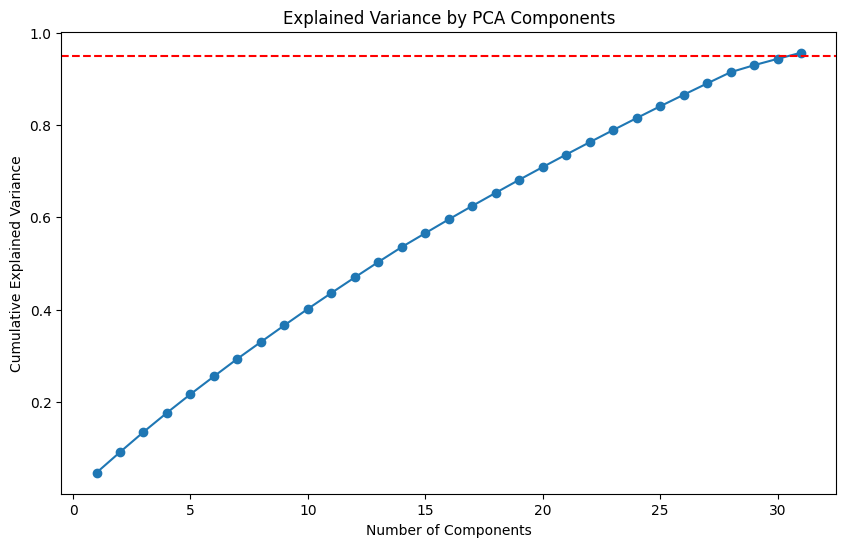

Number of components explaining at least 95.0% variance: 31


In [32]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

num_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f'Number of components explaining at least {0.95*100}% variance: {num_components}')

In [35]:
X_pca_df = pd.DataFrame(X_pca)
y_df = pd.DataFrame(y)

X_pca_df.to_csv('../../data/price_predictor/processed/X_pca.csv', index=False)
y_df.to_csv('../../data/price_predictor/processed/y.csv', index=False)